## Temporal Instanton Problem Instance

Let's make up some simple numbers and make an instance of the temporal instanton problem.

In [1]:
include("../src/TemporalInstanton.jl")
include("../src/TrustRegionSubproblem.jl")

using TemporalInstanton, TrustRegionSubproblem

In [2]:
Ridx = [1,2]
Y = [1 -2 -3;
    -2 2 -4;
    -3 -4 3]
slack = 3
k = [0.25,0.25,0.50]
tau = 2
line = (1,2)
G0 = [0.8,0.9,0.8, 0,0.5,0.5, 0.2,0.3,0.4]
D = flipud(G0)

kQobj = 0
kQtheta = 10

# Create instance of instanton problem:
Qobj,A,b,Qtheta = temporalInstanton(Ridx,Y,slack,k,tau,line,G0,D)

G_of_x = (Qobj,0,kQobj)
Q_of_x = (Qtheta,0,kQtheta)

(
18x18 sparse matrix with 3 Float64 entries:
	[16, 16]  =  1.0
	[17, 17]  =  1.0
	[18, 18]  =  1.0,

0,10)

## Solving the trust region subproblem

In [3]:
# Step 1: translate problem by point closest to origin in
# {x:Ax=b}.

function tr_translate(G_of_x,Q_of_x,A,b)
    """ Starting with min G(x) s.t. ||x||=c, Ax=b,
    translate problem by x_star, the point in 
    {x:Ax=b} closest to the origin. The problem
    becomes min H(x) s.t. ||x||=c', Ax=0.
    (Note: Q(x) == ||x||.)
    
    Returns H_of_x (translated G) and R_of_x
    (translated Q).
    
    Arguments:
    G_of_x has form (G,g,kg), with G matrix, g vector,
    kg constant.
    Q_of_x is entered similarly.
    A and b define the Ax=b relationship.
    """
    x_star = min_norm(A,b)
    
    H_of_x = translate_quadratic(G_of_x,x_star)
    R_of_x = translate_quadratic(Q_of_x,x_star)
    
    return H_of_x,R_of_x
end

tr_translate (generic function with 1 method)

In [4]:
H_of_x,R_of_x = tr_translate(G_of_x,Q_of_x,A,b)

((
18x18 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [5]:
# Step 2: rotate problem to eliminate all but first k
# variables, where k=nullity(A).

function tr_kernel_rotate(G_of_x,A)
    """ Rotate quadratic G_of_x to eliminate all
    but first k variables. Returns quadratic H_of_z
    """
    G,g,kg = G_of_x
    rotation = kernel_rotation(A)
    return (rotation*G,rotation*g,kg)
end

tr_kernel_rotate (generic function with 1 method)

In [32]:
J_of_z = tr_kernel_rotate(H_of_x,A)

(
18x18 Array{Float64,2}:
 -0.518625      0.195443     0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
  0.518625     -0.195443     0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 -5.55112e-17   2.77556e-17  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.259312     -0.0977215    0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 -1.11022e-16   1.11022e-16  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 -0.199593     -0.497278     0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
  0.199593      0.497278     0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
  6.10623e-16   3.1225e-17   0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0997966     0.248639     0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0           0.0          0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
 -0.0807202    -0.279872     0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
  0.0807202     0.279872     0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0
  1.11022e-16  -5.55112e-16  0.0  0.0  0.0     0.0  0.0  0.0  

In [36]:
# Step 3: rotate again to obtain diagonal quadratic.

function tr_diag_rotate(G_of_x)
    """ Change variables to obtain quadratic polynomial
    whose quadratic part is diagonal.
    """
    G,g,kg = G_of_x
    D,V = eig(G)
    return (diagm(D),V'*g,kg)
end

tr_diag_rotate (generic function with 1 method)

In [37]:
K_of_z = tr_diag_rotate(J_of_z)

(
18x18 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …        0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …        0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …        0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im           

## Compressed form

In [1]:
include("../src/TemporalInstanton.jl")
include("../src/TrustRegionSubproblem.jl")

using TemporalInstanton, TrustRegionSubproblem

In [2]:
# Enter data:
Ridx = [1,2]
Y = [1   -1    -1.2;
    -1    2    -2.1;
    -1.2 -2.1   1.3]
slack = 3
k = [0.25,0.25,0.50]
tau = 2
line = (1,2)
G0 = [0.8,0.9,0.8, 0,0.5,0.5]
D = flipud(G0)

kQobj = 0
kQtheta = 10

10

In [3]:
# Create instance of instanton problem:
Qobj,A,b,Qtheta = temporalInstanton(Ridx,Y,slack,k,tau,line,G0,D)

G_of_x = (Qobj,0,kQobj)
Q_of_x = (Qtheta,0,kQtheta)

H_of_x,R_of_x = tr_translate(G_of_x,Q_of_x,A,b)
J_of_z,Rkernel = tr_kernel_rotate(H_of_x,A)
K_of_w,Reigvec = tr_diag_rotate(J_of_z)

(
12x12 Array{Float64,2}:
 -2.22045e-16   0.0          0.0          …  0.0          0.0  0.0  0.0  0.0
  0.0          -3.27429e-17  0.0             0.0          0.0  0.0  0.0  0.0
  0.0           0.0          4.93503e-18     0.0          0.0  0.0  0.0  0.0
  0.0           0.0          0.0             0.0          0.0  0.0  0.0  0.0
  0.0           0.0          0.0             0.0          0.0  0.0  0.0  0.0
  0.0           0.0          0.0          …  0.0          0.0  0.0  0.0  0.0
  0.0           0.0          0.0             0.0          0.0  0.0  0.0  0.0
  0.0           0.0          0.0             6.66134e-16  0.0  0.0  0.0  0.0
  0.0           0.0          0.0             0.0          1.0  0.0  0.0  0.0
  0.0           0.0          0.0             0.0          0.0  1.0  0.0  0.0
  0.0           0.0          0.0          …  0.0          0.0  0.0  1.0  0.0
  0.0           0.0          0.0             0.0          0.0  0.0  0.0  1.0,

12x1 Array{FloatingPoint,2}:
  4.93038e-32
 -1.1

The problem now has the form $$\min w^\top K w + k^\top w + k_k$$ subject to $$\lVert w \rVert = k_r~.$$

The first-order optimality conditions for this constrained optimization problem are

\begin{align}
2w^\top K + k &= \frac{\mu}{k_r}w & \\
\iff 2w_iK_i + k_i &= \frac{\mu}{k_r}w_i & \text{for }i=1,\ldots,k
\end{align}
where $K_i$ is the $i$th diagonal element of $K$, and $\mu$ is the Lagrange multiplier (a scalar) associated with the norm equality constraint. We search for a solution to this system of equations via enumeration:

1. Check the cases $\mu=0$ and $\mu=K_i,~i=1\ldots k$. Each value of $\mu$ yields $\bar{w}$ that satisfies the necessary optimality condition. These values of $\bar{w}$ must be checked for feasibility (to ensure that $\lVert \bar{w} \rVert = k_r$).

2. If all previous potential solutions were infeasible, we know that $\mu\neq0$ and $\mu\neq K_i$ for $i=1,\ldots,k$. We can express each element of $w$ as $$ w_i = \frac{k_ik_r}{\mu - 2k_rK_i} $$ Furthermore, a potential solution $\bar{w}$ is feasible if and only if $$ \lVert \bar{w} \rVert = k_r \iff \sum_{i=1}^k \left( \frac{k_ik_r}{\mu - 2k_rK_i} \right)^2 = k_r^2 $$ The above condition is called the _secular equation_. It has at most $k$ solutions $\bar{\mu}$, which may be found by starting with $\mu$ between two poles and adjusting until the secular equation is satisfied (to within some accuracy).

In [2]:
function tr_secular(mu,c,g,G)
    d = diag(G)
    return sum([(c*g[i]/(mu - 2*c*d[i]))^2 for i in 1:length(d)])
end

tr_secular (generic function with 1 method)

In [1]:
using Interact
using PyPlot

INFO: Loading help data...


Slider{Float64}([Input{Float64}] 2.0,"k",2.0,1.0:0.1:3.0)

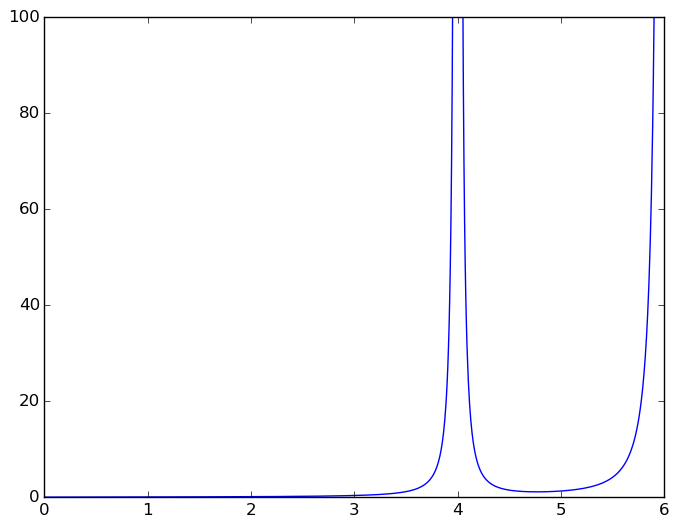

In [14]:
c = 0.5
g = [1,2,3]
G = diagm([2,3,5])

f = figure()
mu = linspace(0,6,1000)
@manipulate for k=1:0.1:3; withfig(f) do
        PyPlot.plot(mu, [tr_secular(mu[i],c,g,k*G) for i in 1:length(mu)])
        ylim([0,100])
    end
end

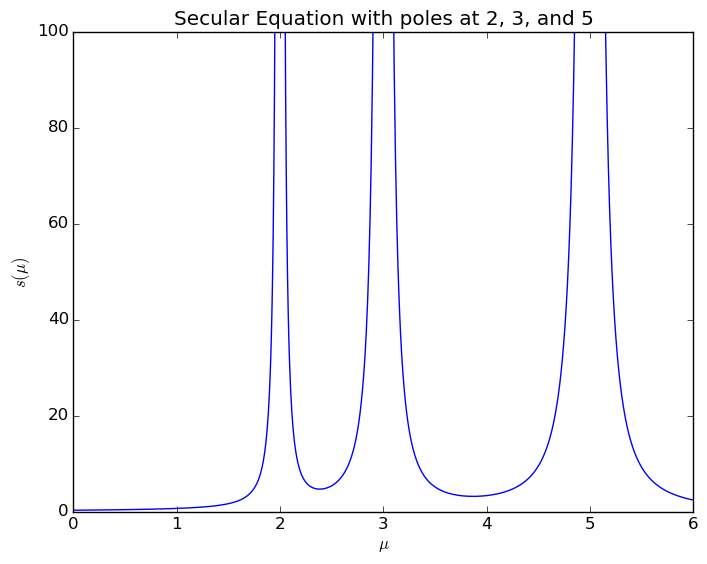

In [21]:
PyPlot.plot(mu, [tr_secular(mu[i],c,g,G) for i in 1:length(mu)])
ylim([0,100])
title("Secular Equation with poles at 2, 3, and 5")
xlabel(L"\mu")
ylabel(L"s(\mu)")
savefig("../images/secular.pdf")